In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def binstep(x, th=0):
    return 1 if x>=th else -1

In [5]:
def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(func, X, target, padding=1):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()

    color = 'ro', 'bo'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], color[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, func(line_x))
    plt.show()

In [6]:
def hebb_fit(train, target, verbose=False, draw=False, draw_padding=1):
    w = np.zeros(len(train[0]) + 1)     #inisialisasi weight [0,0,0]
    bias = np.ones((len(train), 1))     #membuat kolom bias secara horizontal
    train = np.hstack((bias, train))    #menambahkan tabel bias ke data train

    for r, row in enumerate(train):     #r=index    row=nilai baris 1
        w = [w[i] + row[i] * target[r] for i in range(len(row))]
        # for i in range(len(row)):
        #     hasil = w[i]+(row[i]*target[r])
        #     w[i]=hasil
            
        if verbose:
            print('Bobot:', w)

        if draw:
            plot(line(w, 0), train, target, draw_padding)

    return w

In [24]:
def test(train, target, verbose=False, draw=False, draw_padding=1):
    w = np.zeros(len(train[0]) + 1)     #inisialisasi weight [0,0,0]
    bias = np.ones((len(train), 1))     #membuat kolom bias secara horizontal
    print(f'weight =\n{w}')
    print(f'bias =\n{bias}')
    print(f'train before = \n{train}')
    train = np.hstack((train, bias))    #menambahkan tabel bias ke data train
    print(f'train after = \n{train}')

train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1
model = test(train, target, verbose=True, draw=True)
# output = hebb_predict(train, model)
# accuracy = accuracy_score(output, target)

weight =
[0. 0. 0.]
bias =
[[1.]
 [1.]
 [1.]
 [1.]]
train before = 
((1, 1), (1, -1), (-1, 1), (-1, -1))
train after = 
[[ 1.  1.  1.]
 [ 1. -1.  1.]
 [-1.  1.  1.]
 [-1. -1.  1.]]


In [8]:
def hebb_predict(X, w):
    Y = []

    for x in X:
        y_in = w[0] + np.dot(x, w[1:])
        y = binstep(y_in)

        Y.append(y)

    return Y

In [9]:
def calc_accuracy(a, b):
    s = [1 if a[i] == b[i] else 0 for i in range(len(a))]

    return sum(s) / len(a)

Bobot: [1.0, 1.0, 1.0]


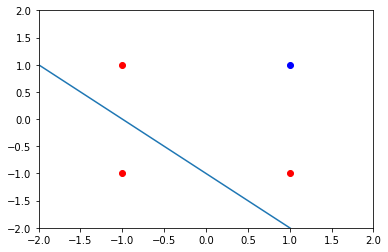

Bobot: [0.0, 0.0, 2.0]


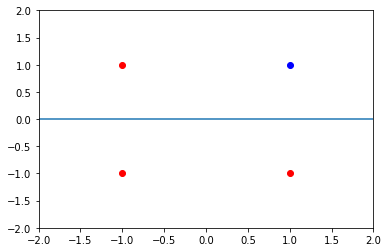

Bobot: [-1.0, 1.0, 1.0]


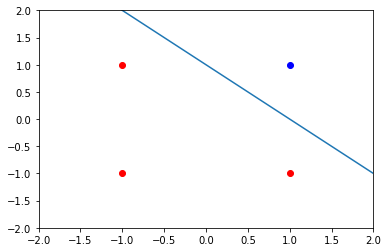

Bobot: [-2.0, 2.0, 2.0]


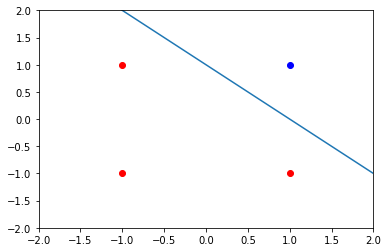

Output: [1, -1, -1, -1]
Target: (1, -1, -1, -1)
Accuracy: 1.0


In [10]:
from sklearn.metrics import accuracy_score

train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1
model = hebb_fit(train, target, verbose=True, draw=True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)

print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

Bobot: [1.0, 1.0, 1.0]


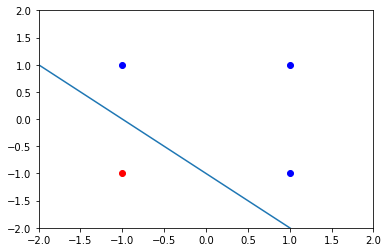

Bobot: [2.0, 2.0, 0.0]


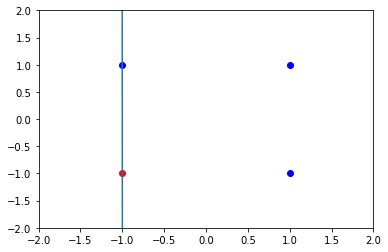

Bobot: [3.0, 1.0, 1.0]


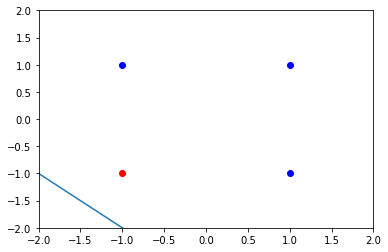

Bobot: [2.0, 2.0, 2.0]


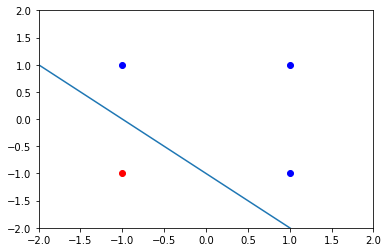

Output: [1, 1, 1, -1]
Target: (1, 1, 1, -1)
Accuracy: 1.0


In [11]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, 1, 1, -1
model = hebb_fit(train, target, verbose=True, draw=True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)

print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

In [12]:
train = [(1, 1), (1, -1), (-1, 1), (-1, -1)]

w = np.zeros(len(train[0]) + 1)
bias = np.ones((len(train), 1))
train = np.hstack((bias, train))

for r, row in enumerate(train):
    print(f'Row {r}: {row}')


Row 0: [1. 1. 1.]
Row 1: [ 1.  1. -1.]
Row 2: [ 1. -1.  1.]
Row 3: [ 1. -1. -1.]


Bobot: [-1.0, -1.0, -1.0]


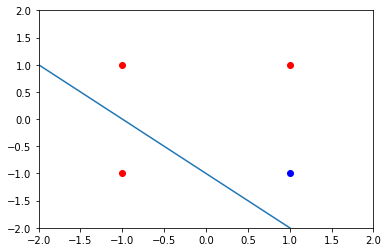

Bobot: [0.0, 0.0, -2.0]


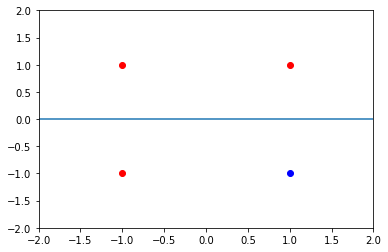

Bobot: [-1.0, 1.0, -3.0]


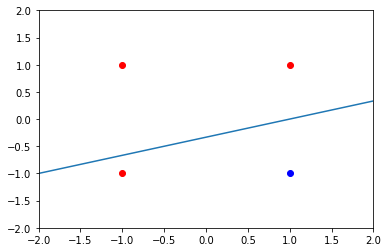

Bobot: [-2.0, 2.0, -2.0]


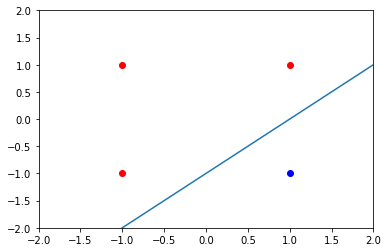

Output: [-1, 1, -1, -1]
Target: (-1, 1, -1, -1)
Accuracy: 1.0


In [13]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, -1, -1
model = hebb_fit(train, target, verbose=True, draw=True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)

print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

Bobot:

 [1.0, 1.0, 1.0]


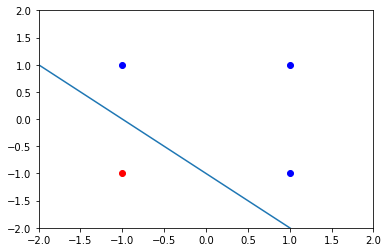

Bobot: [2.0, 2.0, 0.0]


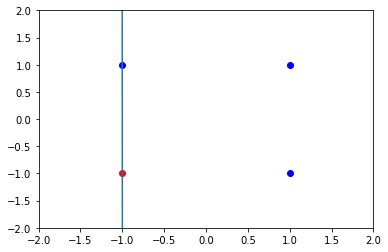

Bobot: [3.0, 1.0, 1.0]


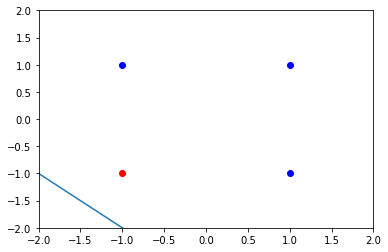

Bobot: [2.0, 2.0, 2.0]


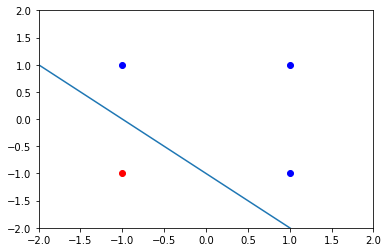

Output: [1, 1, 1, -1]
Target: (1, 1, 1, -1)
Accuracy: 1.0


In [14]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, 1, 1, -1
model = hebb_fit(train, target, verbose=True, draw=True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)

print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

Bobot: [-1.0, -1.0, -1.0]


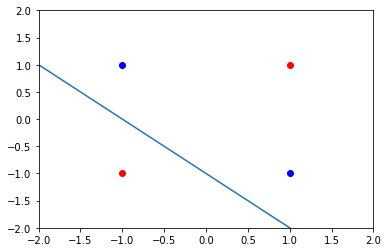

Bobot: [0.0, 0.0, -2.0]


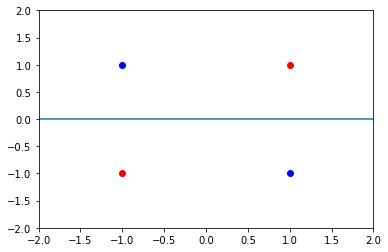

Bobot: [1.0, -1.0, -1.0]


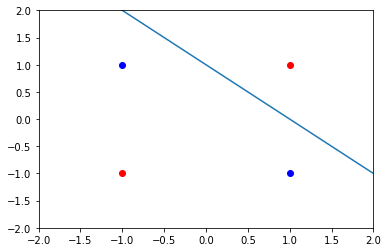

Bobot: [0.0, 0.0, 0.0]


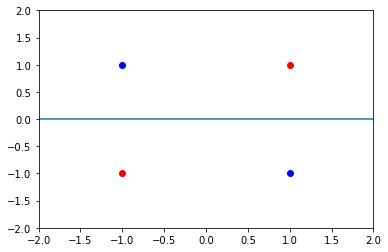

Output: [1, 1, 1, 1]
Target: (-1, 1, 1, -1)
Accuracy: 0.5


In [15]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, 1, -1
model = hebb_fit(train, target, verbose=True, draw=True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)

print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

In [16]:
# karena decission boundary dari hebbnet sendiri adalah linier, tidak cocok 
# untuk XOR yang mana tidak dapat dipisahkan hanya dengan garis linier

# atau dapat disimpulkan metode ini tidak cocok untuk fungsi multi layer
# metode ini sendiri hanya cocok untuk digunakan pada single layer saja.

Bobot: [-1.0, 1.0, -0.5]


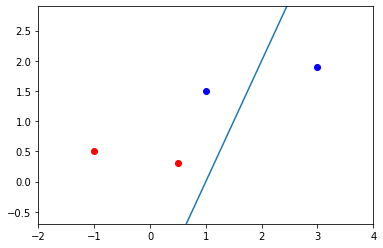

Bobot: [-2.0, 0.5, -0.8]


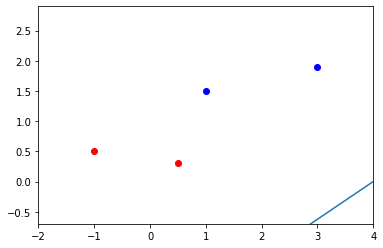

Bobot: [-1.0, 1.5, 0.7]


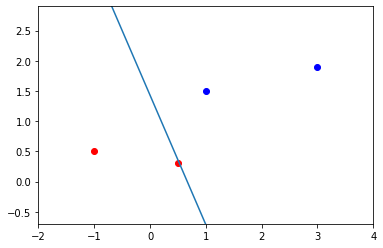

Bobot: [0.0, 4.5, 2.5999999999999996]


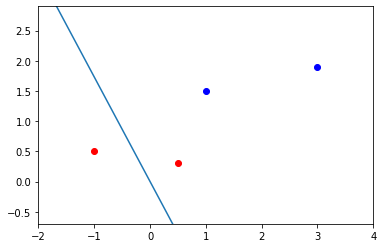

Output: [-1, 1, 1, 1]
Target: (-1, -1, 1, 1)
Accuracy: 0.75


In [17]:
train = (-1, .5), (.5, .3), (1, 1.5), (3, 1.9)
target = -1, -1, 1, 1
model = hebb_fit(train, target, verbose=True, draw=True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)

print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

In [18]:
# karena algoritma hebbian sendiri adalah algoritma yang bipolar (tidak biner)
# dan hanya menggunakan 1 epoch saja dalam prosesnya.
# dikarenakan hanya dapat melakukan 1 epoch saja, maka hasil yang di dapatkan tidak
# makimal